 ## IMDB score of Best Movies Netflix

In [1]:
# Initial imports.
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Read the CSV and Perform Basic Data Cleaning

In [2]:
# Loading data
file_path = Path("./Resources/Best Movies Netflix.csv")
df_best_movies = pd.read_csv(file_path,index_col=0)
df_best_movies.head()

,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION
index,,,,,,,
0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,documentary,GB
1,Inception,2010,8.8,2268288,148,scifi,GB
2,Forrest Gump,1994,8.8,1994599,142,drama,US
3,Anbe Sivam,2003,8.7,20595,160,comedy,IN
4,Bo Burnham: Inside,2021,8.7,44074,87,comedy,US


In [3]:
# Find Average Score 
df_best_movies_avg_score = df_best_movies["SCORE"].mean()
df_best_movies_avg_score

7.509043927648568

In [4]:
#Adding a new column where 1 is above avg score values and 0 below avg score values
df_best_movies['ABOVE AVG SCORE']= df_best_movies['SCORE'].apply(lambda x: '1' if x >= df_best_movies['SCORE'].mean() else '0')
                
df_best_movies

,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION,ABOVE AVG SCORE
index,,,,,,,,
0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,documentary,GB,1
1,Inception,2010,8.8,2268288,148,scifi,GB,1
2,Forrest Gump,1994,8.8,1994599,142,drama,US,1
3,Anbe Sivam,2003,8.7,20595,160,comedy,IN,1
4,Bo Burnham: Inside,2021,8.7,44074,87,comedy,US,1
...,...,...,...,...,...,...,...,...
382,The Trip,2021,6.9,19706,113,comedy,NO,0
383,The Dirt,2019,6.9,47603,108,drama,US,0
384,Top Gun,1986,6.9,329656,110,drama,US,0


In [5]:
#  Remove all the non numeric value columns
ml_df= df_best_movies[[ 'ABOVE AVG SCORE','RELEASE_YEAR', 'NUMBER_OF_VOTES','DURATION', 'MAIN_GENRE','MAIN_PRODUCTION']]

ml_df.head()

,ABOVE AVG SCORE,RELEASE_YEAR,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION
index,,,,,,
0,1,2020,31180,83,documentary,GB
1,1,2010,2268288,148,scifi,GB
2,1,1994,1994599,142,drama,US
3,1,2003,20595,160,comedy,IN
4,1,2021,44074,87,comedy,US


In [6]:
movies_df = ml_df.copy()

In [7]:
#Transforming the column 'mode' from text to numerical value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

movies_df['MAIN_GENRE'] = le.fit_transform(movies_df['MAIN_GENRE'])
movies_df

,ABOVE AVG SCORE,RELEASE_YEAR,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION
index,,,,,,
0,1,2020,31180,83,4,GB
1,1,2010,2268288,148,10,GB
2,1,1994,1994599,142,5,US
3,1,2003,20595,160,2,IN
4,1,2021,44074,87,2,US
...,...,...,...,...,...,...
382,0,2021,19706,113,2,NO
383,0,2019,47603,108,5,US
384,0,1986,329656,110,5,US


In [8]:
#Transforming the column 'MAIN_PRODUCTION' from text to numerical value
le = LabelEncoder()

movies_df['MAIN_PRODUCTION'] = le.fit_transform(movies_df['MAIN_PRODUCTION'])
movies_df

,ABOVE AVG SCORE,RELEASE_YEAR,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION
index,,,,,,
0,1,2020,31180,83,4,11
1,1,2010,2268288,148,10,11
2,1,1994,1994599,142,5,32
3,1,2003,20595,160,2,16
4,1,2021,44074,87,2,32
...,...,...,...,...,...,...
382,0,2021,19706,113,2,25
383,0,2019,47603,108,5,32
384,0,1986,329656,110,5,32


  ## Split the Data into Training and Testing

In [9]:
# Create our features
X = movies_df.drop(columns="ABOVE AVG SCORE", axis=1)


# Create our target
y = movies_df["ABOVE AVG SCORE"]

In [10]:
X.describe()

,RELEASE_YEAR,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION
count,387.000000,3.870000e+02,387.000000,387.000000,387.000000
mean,2011.023256,1.365206e+05,123.395349,6.031008,21.935401
std,10.813874,2.342114e+05,28.371632,3.478888,9.488114
min,1954.000000,1.013900e+04,28.000000,0.000000,0.000000
25%,2008.000000,2.051250e+04,103.500000,4.000000,16.000000
50%,2014.000000,4.520000e+04,122.000000,5.000000,18.000000
75%,2018.000000,1.534855e+05,139.000000,9.000000,32.000000
max,2022.000000,2.268288e+06,229.000000,14.000000,34.000000


In [11]:
# Check the balance of our target values
y.value_counts()

0    223
1    164
Name: ABOVE AVG SCORE, dtype: int64

In [12]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(290, 5)

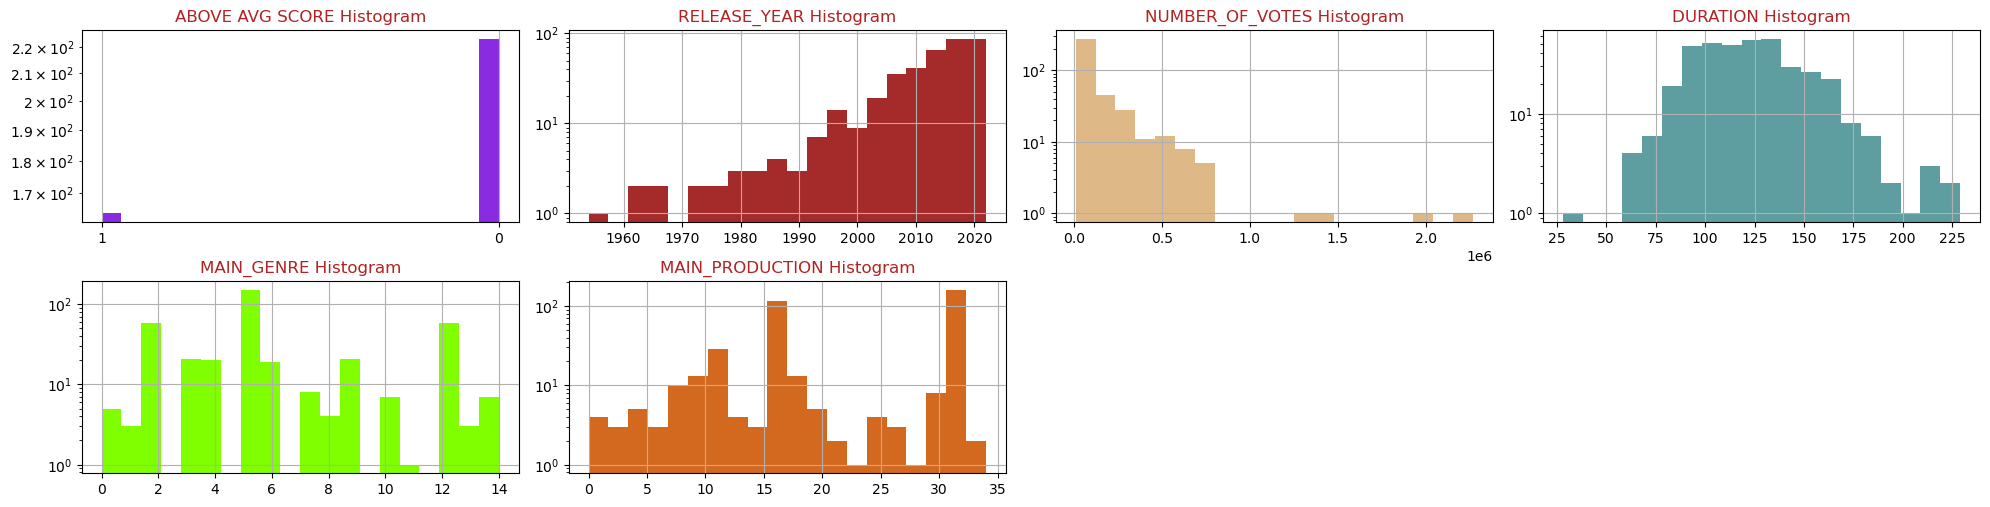

In [13]:
#Visualize the features histogram
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(movies_df,movies_df.columns,8,4)

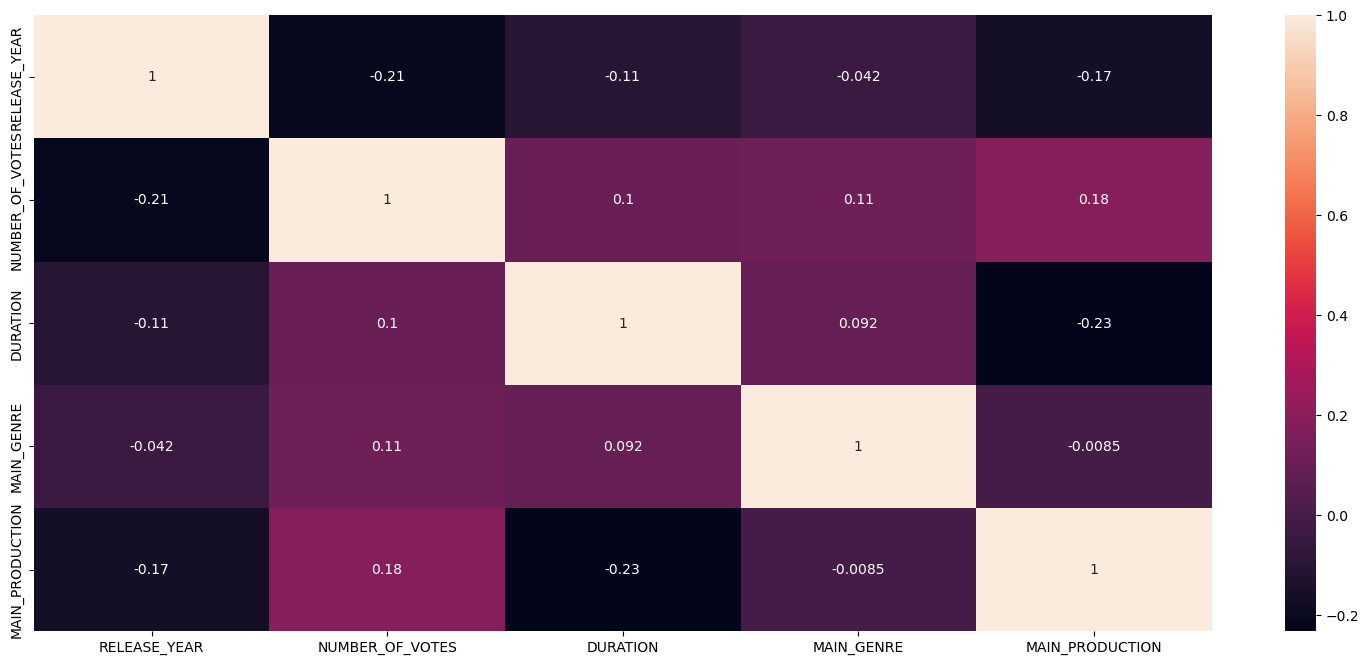

In [14]:
#Observe the dependency of variables on each other by studying their correlation
plt.figure(figsize = (19,8))
sns.heatmap(movies_df.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

## Create a Random Forest model

In [15]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

In [16]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [17]:
# Making predictions using the testing data.
y_pred = rf_model.predict(X_test)

In [18]:
# Calculated the balanced accuracy score
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 67.0103092783505


In [19]:
# Print the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.75      0.72        56
           1       0.62      0.56      0.59        41

    accuracy                           0.67        97
   macro avg       0.66      0.66      0.66        97
weighted avg       0.67      0.67      0.67        97



In [20]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[42 14]
 [18 23]]


In [21]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df
# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred)

In [22]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,42,14
Actual 1,18,23


Accuracy Score : 0.6701030927835051
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.75      0.72        56
           1       0.62      0.56      0.59        41

    accuracy                           0.67        97
   macro avg       0.66      0.66      0.66        97
weighted avg       0.67      0.67      0.67        97



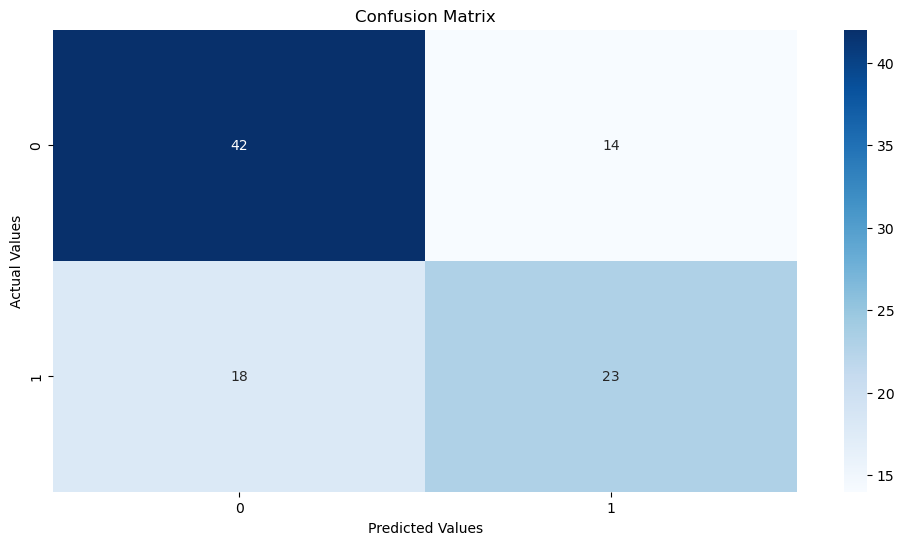

In [23]:
# Display the confusion matrix graph
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [24]:
# List the features sorted in descending order by feature importance
features = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
for feature in features:
    print(f"{feature[1]}: ({feature[0]})")

NUMBER_OF_VOTES: (0.33951783728243073)
DURATION: (0.26419871800591865)
RELEASE_YEAR: (0.1744971722142865)
MAIN_PRODUCTION: (0.11132011935934791)
MAIN_GENRE: (0.11046615313801611)
